<a href="https://colab.research.google.com/github/mcyutta2/ALX-training/blob/main/Dartspractice2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 814.3/814.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.9/110.9 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2

In [4]:
from darts.datasets import AirPassengersDataset

In [5]:
from darts.datasets import MonthlyMilkDataset

In [6]:
AirPassengersDataset().load().pd_series()

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Freq: MS, Length: 144, dtype: float64

In [7]:
MonthlyMilkDataset().load().pd_series()

Month
1962-01-01    589.0
1962-02-01    561.0
1962-03-01    640.0
1962-04-01    656.0
1962-05-01    727.0
              ...  
1975-08-01    858.0
1975-09-01    817.0
1975-10-01    827.0
1975-11-01    797.0
1975-12-01    843.0
Freq: MS, Length: 168, dtype: float64

In [8]:
# Load the AirPassengers dataset and convert it to a Pandas DataFrame
df = AirPassengersDataset().load().pd_series()

In [9]:
# Load the MonthlyMilkDataset dataset and convert it to a Pandas DataFrame
df1=MonthlyMilkDataset().load().pd_series()

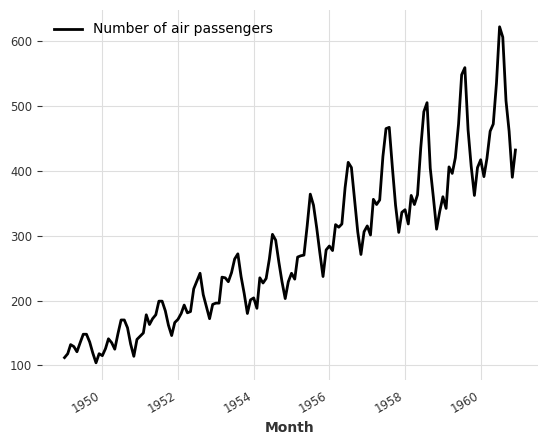

In [11]:
import matplotlib.pyplot as plt
df = AirPassengersDataset().load()

df.plot(label='Number of air passengers')
plt.legend();

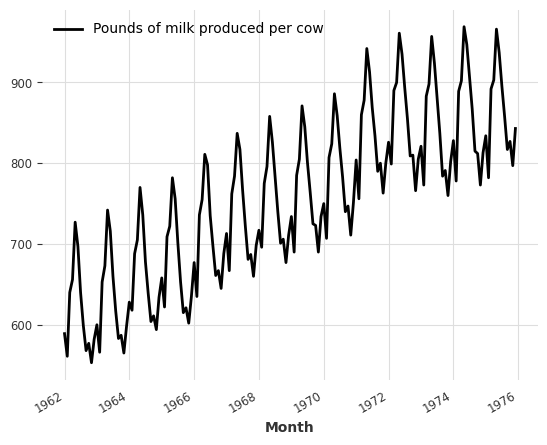

In [12]:
df1 = MonthlyMilkDataset().load()
df1.plot(label='Pounds of milk produced per cow')
plt.legend();

Fit an exponential smoothing model, and make a (probabilistic) prediction over the validation series' duration:

In [19]:
from darts.models import ExponentialSmoothing

train, val = df[:-36], df[-36:]
model = ExponentialSmoothing()
model.fit(train)
prediction1 = model.predict(len(val), num_samples=1000)

In [20]:
from darts.models import ExponentialSmoothing

train, val = df1[:-36], df1[-36:]
model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=1000)

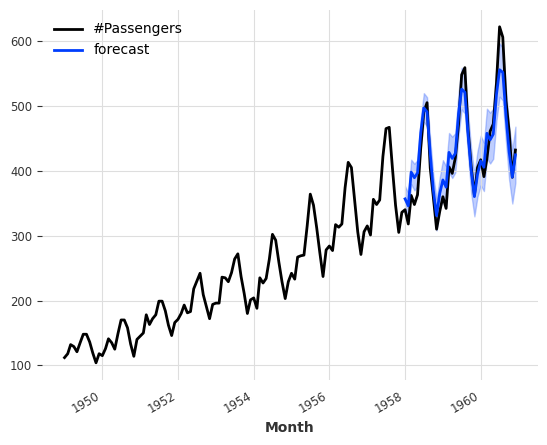

In [21]:
import matplotlib.pyplot as plt

df.plot()
prediction1.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

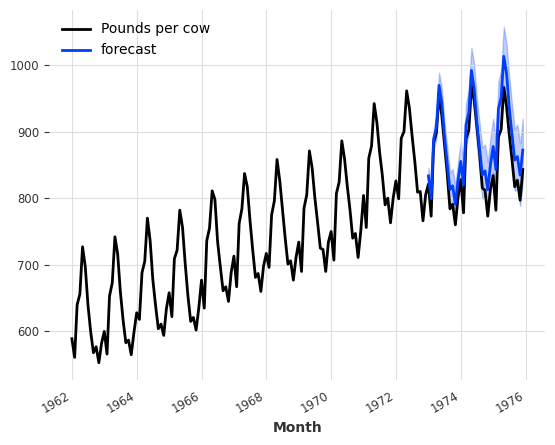

In [16]:
import matplotlib.pyplot as plt

df1.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

Anomaly Detection
Load a multivariate series, trim it, keep 2 components, split train and validation sets:

In [22]:
from darts.datasets import ETTh2Dataset

df = ETTh2Dataset().load()[:10000][["MUFL", "LULL"]]
train, val = df.split_before(0.6)

In [23]:
#Build a k-means anomaly scorer, train it on the train set and use it on the validation set to get anomaly scores:
from darts.ad import KMeansScorer

scorer = KMeansScorer(k=2, window=5)
scorer.fit(train)
anom_score = scorer.score(val)

In [24]:
#Build a binary anomaly detector and train it over train scores, then use it over validation scores to get binary anomaly classification:
from darts.ad import QuantileDetector

detector = QuantileDetector(high_quantile=0.99)
detector.fit(scorer.score(train))
binary_anom = detector.detect(anom_score)

<Axes: xlabel='date'>

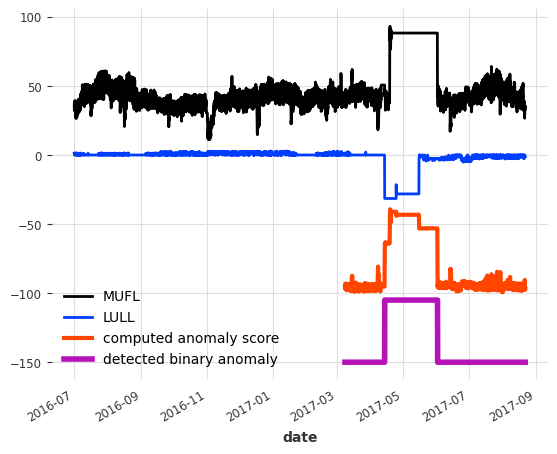

In [25]:
#Plot (shifting and scaling some of the series to make everything appear on the same figure):
import matplotlib.pyplot as plt

df.plot()
(anom_score / 2. - 100).plot(label="computed anomaly score", c="orangered", lw=3)
(binary_anom * 45 - 150).plot(label="detected binary anomaly", lw=4)

In [28]:
#Now lets do same for df1
from darts.datasets import ETTh2Dataset

df1 = ETTh2Dataset().load()[:10000][["MUFL", "LULL"]]
train, val = df.split_before(0.6)

In [29]:
#Build a k-means anomaly scorer, train it on the train set and use it on the validation set to get anomaly scores:
from darts.ad import KMeansScorer

scorer = KMeansScorer(k=2, window=5)
scorer.fit(train)
anom_score = scorer.score(val)

In [30]:
#Build a binary anomaly detector and train it over train scores, then use it over validation scores to get binary anomaly classification:
from darts.ad import QuantileDetector

detector = QuantileDetector(high_quantile=0.99)
detector.fit(scorer.score(train))
binary_anom = detector.detect(anom_score)

<Axes: xlabel='date'>

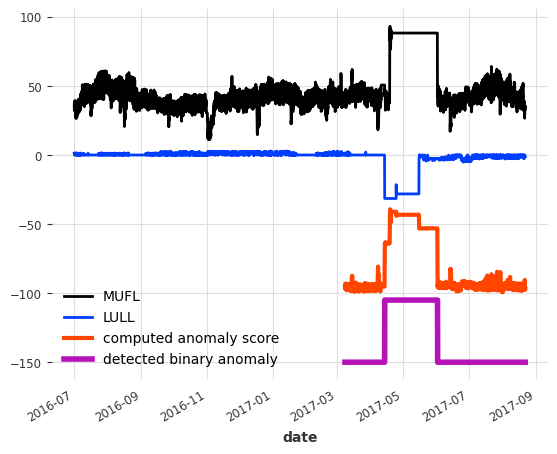

In [31]:
#Plot (shifting and scaling some of the series to make everything appear on the same figure):
import matplotlib.pyplot as plt

df1.plot()
(anom_score / 2. - 100).plot(label="computed anomaly score", c="orangered", lw=3)
(binary_anom * 45 - 150).plot(label="detected binary anomaly", lw=4)

In [32]:
df.head()

<TimeSeries (DataArray) (date: 5, component: 2, sample: 1)>
array([[[36.5359993 ],
        [ 1.31099999]],

       [[33.93600082],
        [ 1.21500003]],

       [[35.33000183],
        [ 0.        ]],

       [[35.54399872],
        [ 1.21500003]],

       [[35.40999985],
        [ 0.        ]]])
Coordinates:
  * date       (date) datetime64[ns] 2016-07-01 ... 2016-07-01T04:00:00
  * component  (component) object 'MUFL' 'LULL'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [33]:
df1.head()

<TimeSeries (DataArray) (date: 5, component: 2, sample: 1)>
array([[[36.5359993 ],
        [ 1.31099999]],

       [[33.93600082],
        [ 1.21500003]],

       [[35.33000183],
        [ 0.        ]],

       [[35.54399872],
        [ 1.21500003]],

       [[35.40999985],
        [ 0.        ]]])
Coordinates:
  * date       (date) datetime64[ns] 2016-07-01 ... 2016-07-01T04:00:00
  * component  (component) object 'MUFL' 'LULL'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None